#### Bank Card Analysis

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_users = pd.read_csv('users_data.csv')

df_cards = pd.read_csv('cards_data.csv')

In [5]:
df_users.head(5)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [17]:
df_cards.head(5)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [8]:
df_users.shape

(2000, 14)

In [9]:
df_users['num_credit_cards'].sum()

6146

In [11]:
df_cards.shape

(6146, 13)

### Number of credit cards held in comparison to Gender

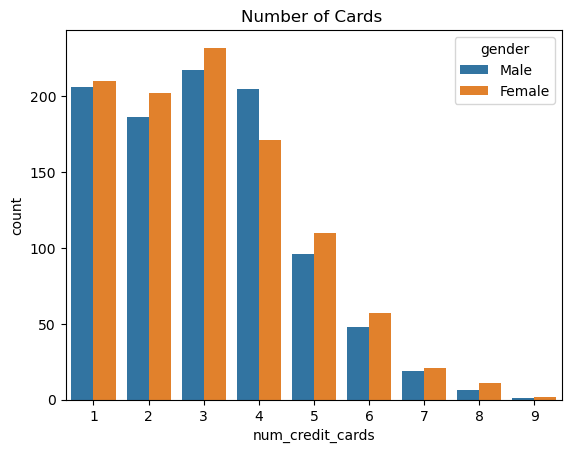

In [21]:
sns.countplot(x='num_credit_cards',data=df_users, hue='gender')
plt.title('Number of Cards ')
plt.show()

#### The above graph shows the following points:
 1.) The study shows from a sample population more than 200 people hold 3 credit cards.
 
 2.) The study gives us an idea that as per the data females tend to hold more credit cards than males.
 
 3.) Adults prefer to use/hold upto an average of 4 credit cards.
 
 4.) The graph shows that adults holding more than 4 cards is showing a downward trend.
 
 5.) Majority of people tend to use upto 3 cards and thus is further compared that females in comparison to males use more credit cards.

### Card Types

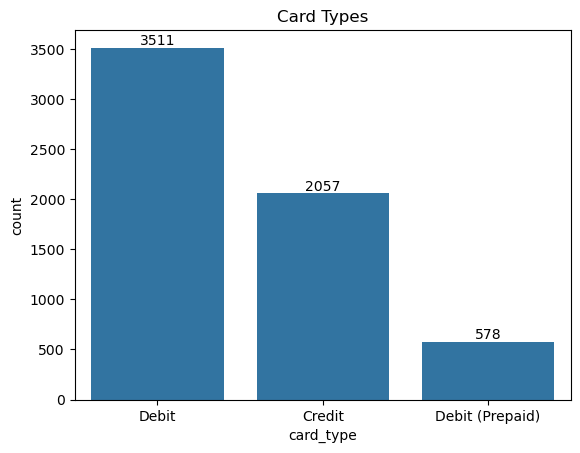

In [74]:
df=sns.countplot(x='card_type',data=df_cards)
for bars in df.containers:
    df.bar_label(bars)
plt.title('Card Types')
plt.show()

#### The graph shows :
1) Majority of people use Debit cards, Credit cards steals the 2nd place while least number of people use Debit(Prepaid).
2) From a population of 4000 people, 
              a) Debit card holders are ~ 3511.
              b) Credit card holders are ~ 2057.
              c) Debit(Prepaid)card holders are ~ 578.


In [216]:
#The 2 csv files are merged for further calculations.
merged_df_cardusers = pd.merge(df_users, df_cards,left_on='id',right_on='client_id', how='inner')

In [218]:
merged_df_cardusers.shape

(6146, 27)

In [220]:
merged_df_cardusers.head(200)

,id_x,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,...,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,...,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,...,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,...,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,...,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,882,63,65,1956,8,Male,7605 Essex Boulevard,40.39,-82.47,$18019,...,Debit,5707305515533516,04/2020,203,YES,2,$1837,06/2010,2010,No
196,882,63,65,1956,8,Male,7605 Essex Boulevard,40.39,-82.47,$18019,...,Debit,5864987017850552,08/2023,258,YES,2,$17453,02/2006,2008,No
197,348,49,70,1970,7,Female,480 Seventh Lane,40.22,-74.76,$22747,...,Debit,4228885239928189,10/2013,543,NO,1,$28283,05/2008,2012,No
198,348,49,70,1970,7,Female,480 Seventh Lane,40.22,-74.76,$22747,...,Credit,4210237285941913,04/2020,160,YES,1,$13500,05/2010,2012,No


### Card types in comparison to Gender

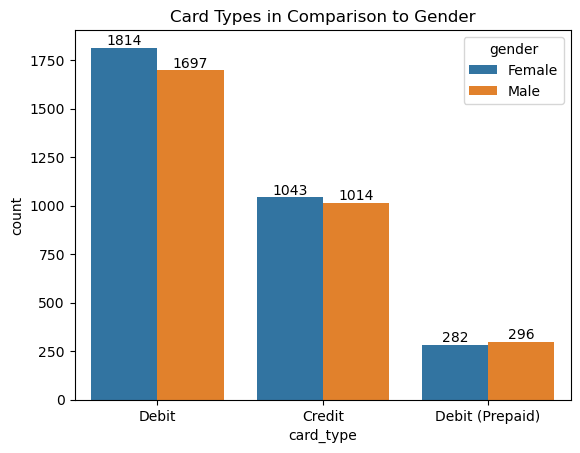

In [76]:
merged_df= sns.countplot(x='card_type',data=merged_df_cardusers, hue='gender')
for bars in merged_df.containers:
    merged_df.bar_label(bars)



plt.title('Card Types in Comparison to Gender')
plt.show()

In [223]:
# The Study shows females using Debit and Credit cards more in comparison to males
# A slight more number of males use Debit(prepaid)cards than compared to females
# Debit cards : Females = 1814 ; Males = 1697
# Credit cards : Females = 1043 ; Males = 1014
# Debit(Prepaid) : Females = 282 ; Males = 296

### E-chip Cards

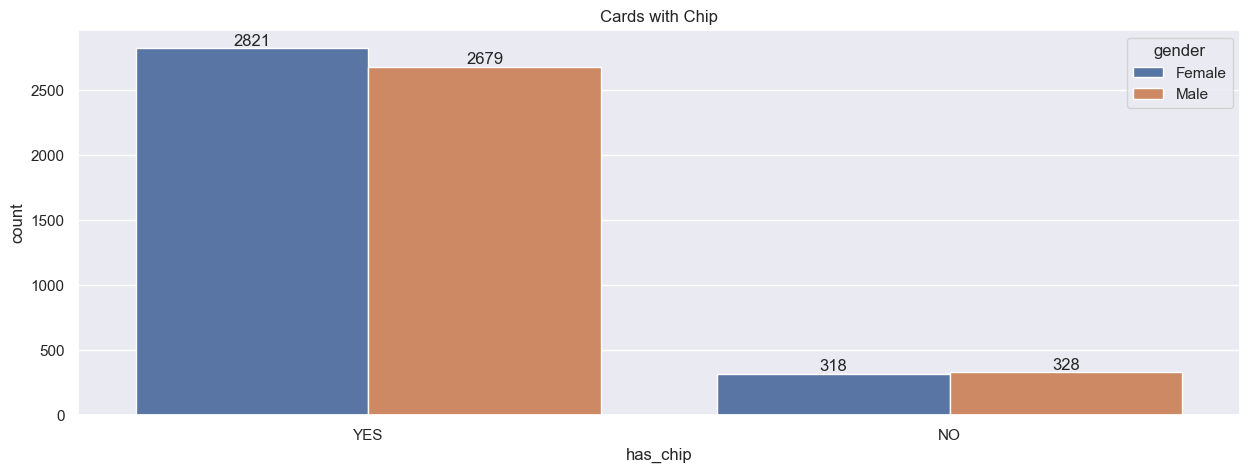

In [134]:
merged_df = sns.countplot(data =merged_df_cardusers, x = 'has_chip' ,hue='gender')

for bars in merged_df.containers:
    merged_df.bar_label(bars)

plt.title('Cards with Chip')
plt.show()

In [226]:
# The Study shows :
# Majority cards are equipped with electronic chip.
# E-chip cards : Females = 2821 ; Males = 2679 ; Total e-chip cards = 5500
# Swipe cards without e-chip : Females = 318 ; Males = 328 ; Total swipe cards = 646


### Current Age of Card Holders

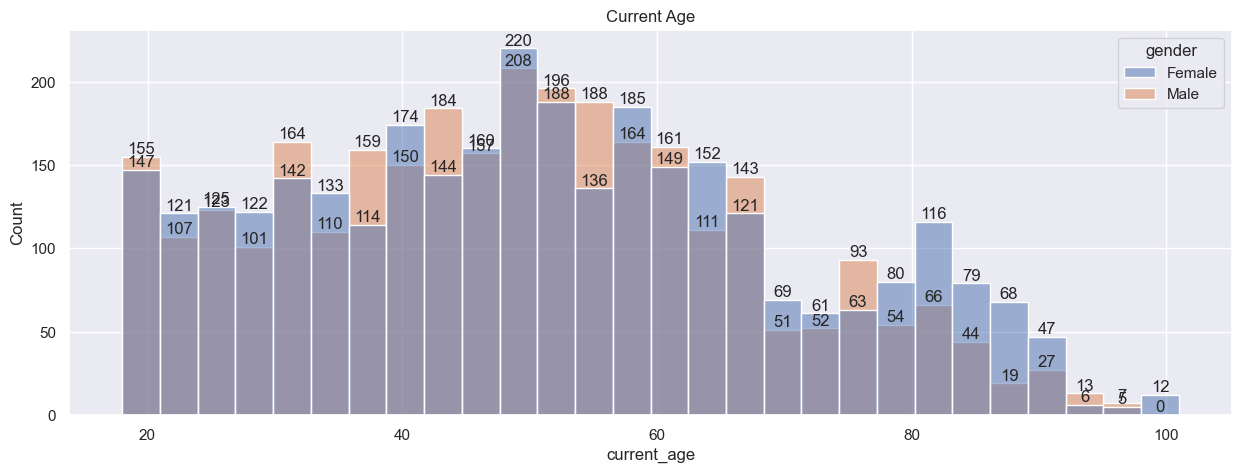

In [144]:
merged_df = sns.histplot(data =merged_df_cardusers, x = 'current_age' ,hue='gender')

for bars in merged_df.containers:
    merged_df.bar_label(bars)

plt.title('Current Age')
plt.show()

In [228]:
# Majority of card holder lie between the age-group of 40-60


### Retirement Age of Card Holders

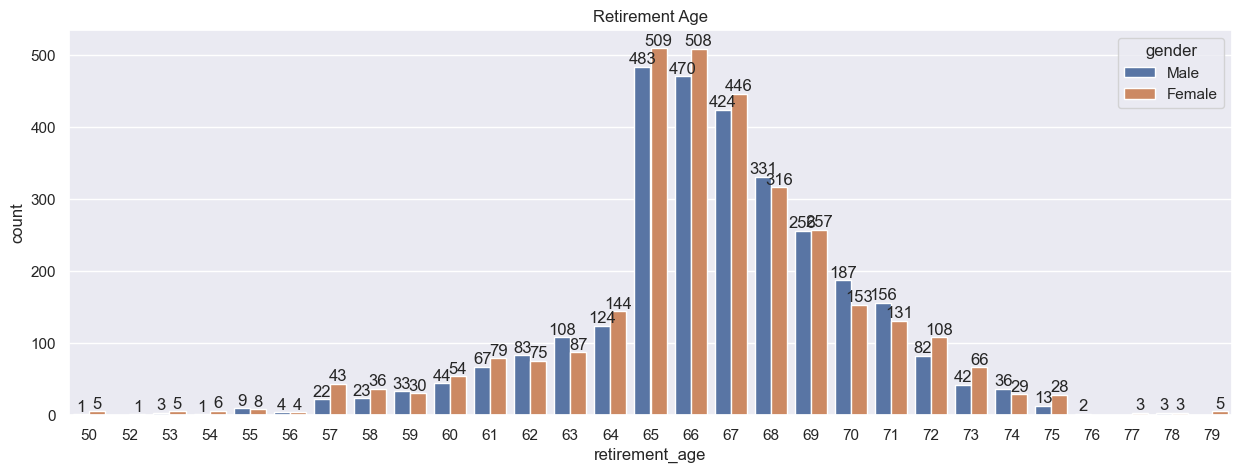

In [152]:
merged_df = sns.countplot(data =merged_df_cardusers, x = 'retirement_age' ,hue='gender')

for bars in merged_df.containers:
    merged_df.bar_label(bars)

plt.title('Retirement Age')
plt.show()

In [230]:
# Majority of card holders retirement age is between 65-66


### Card Brands

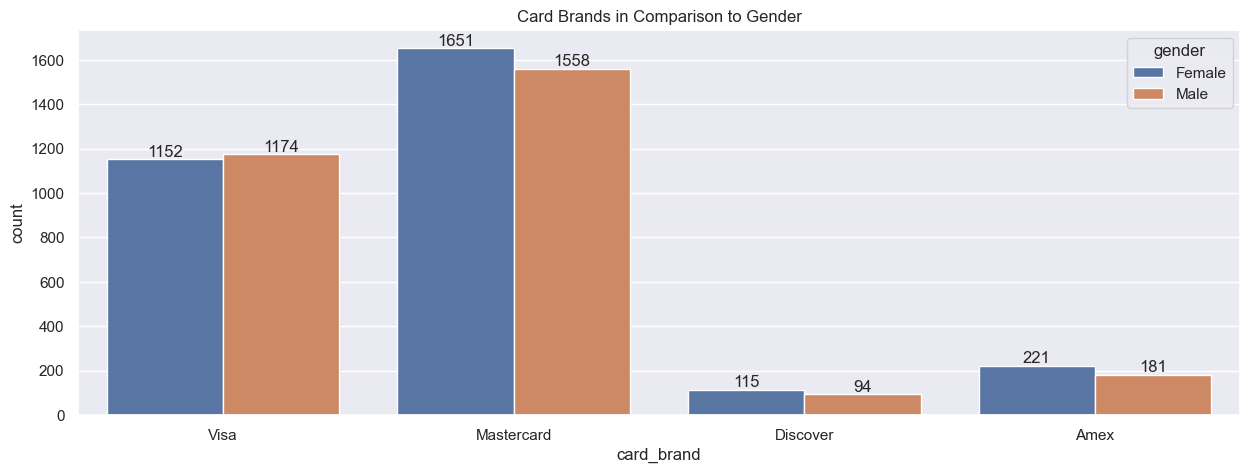

In [154]:
merged_df= sns.countplot(x='card_brand',data=merged_df_cardusers, hue='gender')
for bars in merged_df.containers:
    merged_df.bar_label(bars)



plt.title('Card Brands in Comparison to Gender')
plt.show()

In [232]:
# Card Brands like Mastercard and Visa hold the majority stake among the people,
# whereas Amex and Discover hold the 3rd and 4th spot.
# Majority of cards consists of the brand Mastercard, with a total number of 3209 people from the sample
# This total number of Mastercard is further classied between Females : 1651 and Males : 1558.
# Whereas Visa in 2nd spot consists of total = 2326 cards further classified Females : 1152 ; Males : 1174
# Only a small margin of people use Discover ~ Females: 115 ; Males : 94
# the third spot is taken by Amex card Brand ~ Females: 221 ; Males: 181

### Total Debt v/s Yearly Income

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_17480\3766620758.py:2: SyntaxWarning: invalid escape sequence '\$'
  merged_df_cardusers['total_debt'] = merged_df_cardusers['total_debt'].replace('[\$,]', '', regex=True).astype(float)


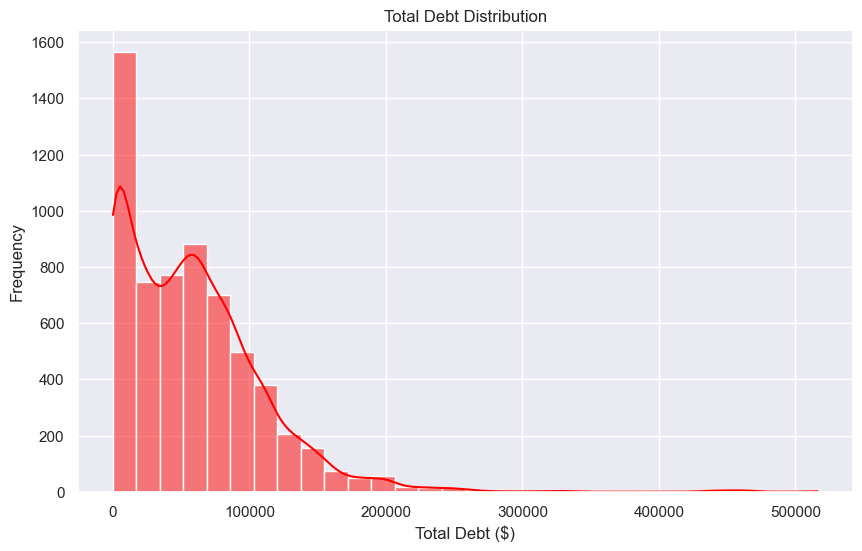

In [198]:
# Convert the 'total_debt' column to numeric (removing any $ or comma if applicable)
merged_df_cardusers['total_debt'] = merged_df_cardusers['total_debt'].replace('[\$,]', '', regex=True).astype(float)

# Plot the total_debt distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_cardusers['total_debt'], bins=30, kde=True, color='red')
plt.title('Total Debt Distribution')
plt.xlabel('Total Debt ($)')
plt.ylabel('Frequency')
plt.show()


In [234]:
# The Graph Shows us the total debt distribution
# Where x-axis : Shows total debt in  dollars '$'
# AND y-axis : Shows us the Frequency.
# Here, Frequency means,
#(For example, if 50 users have a total debt between $10,000 and $20,000, the frequency for that bin is 50.)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_17480\994077164.py:2: SyntaxWarning: invalid escape sequence '\$'
  merged_df_cardusers['yearly_income'] = merged_df_cardusers['yearly_income'].replace('[\$,]', '', regex=True).astype(float)


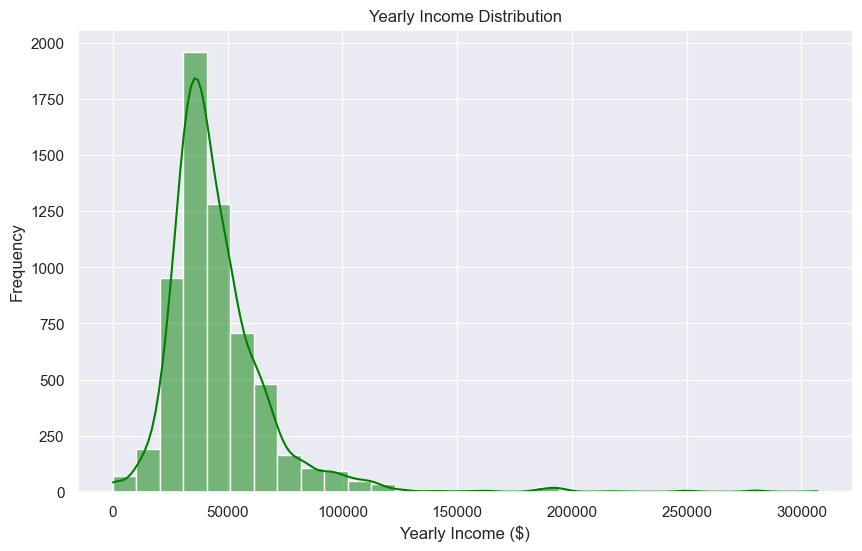

In [195]:
# Convert the 'total_debt' column to numeric (removing any $ or comma if applicable)
merged_df_cardusers['yearly_income'] = merged_df_cardusers['yearly_income'].replace('[\$,]', '', regex=True).astype(float)

# Plot the total_debt distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_cardusers['yearly_income'], bins=30, kde=True, color='green')
plt.title('Yearly Income Distribution')
plt.xlabel('Yearly Income ($)')
plt.ylabel('Frequency')
plt.show()


In [236]:
# The Graph Shows us the Yearly Income distribution
# Where x-axis : Shows Annual Income in  dollars '$'
# AND y-axis : Shows us the Frequency.
# Here, Frequency means,
#(For example, if 50 users have a total Annual Income between $10,000 and $20,000, the frequency for that bin is 50.)

# Conclusion

#### From the given data, We find some key-points through which conclusion can be made:
1) Females use more credit cards than males.
2) Debit cards are preferred more than credit cards.
3) Majority of the cards are e-chip enabled.
4) People from the age group between 40-60 make active transactions through cards.
5) Majority of cardholders have their retirement age between the age group 65-70.
6) Mastercard and Visa are more reliable card brands
7) Total Debt count is more than yearly income, which denotes more expense.

From the keypoints we could conclude that, financial transactions are made more by females than compared to males. Income is lower than the total debt which explains more spending power, however debt can be repaid with interest in regular installments. Hence, no sign of defaults is noted.